In [1]:
import numpy as np 
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [2]:
import data_prep as dp

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test = \
    dp.X_train, dp.X_val, dp.X_test, dp.y_train, dp.y_val, dp.y_test

In [4]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.747
  10 -> 0.697
  15 -> 0.663
  20 -> 0.657
None -> 0.664


5 is the best, 4, 5, 6 are good, with auc score 76%

In [7]:
scores = []
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 50, 100, 200, 500]:
            dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
            dt.fit(X_train, y_train)

            y_pred = dt.predict_proba(X_val)[:, 1]
            auc = roc_auc_score(y_val, y_pred)
            scores.append((d, s, auc))
            #print('%4s %3d -> %.3f' % (d, s, auc))
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
df_scores.sort_values(by='auc', ascending=False).head()


,max_depth,min_samples_leaf,auc
24,6,15,0.785319
23,6,10,0.778299
27,6,100,0.776434
15,5,20,0.774028
25,6,20,0.773982


In [11]:
df_scores.pivot(index='min_samples_leaf',
                columns=['max_depth'],
                values=['auc']).round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.766  0.752
2                 0.761  0.766  0.766
5                 0.761  0.768  0.762
10                0.761  0.762  0.778
15                0.764  0.772  0.785
20                0.761  0.774  0.774
50                0.753  0.767  0.770
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

In [12]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',
                columns=['max_depth'],
                values=['auc']).round(3)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

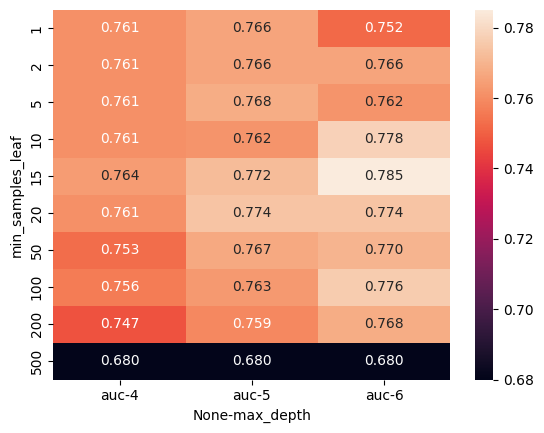

In [15]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f');

,max_depth,min_samples_leaf,auc
44,10.0,15,0.791
74,NaN,15,0.787
54,15.0,15,0.787
64,20.0,15,0.786
24,6.0,15,0.785


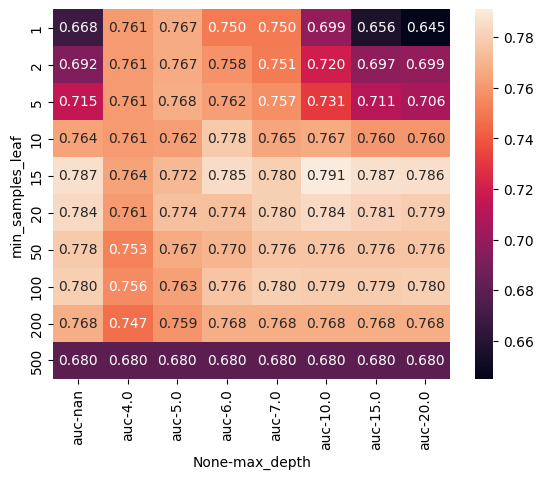

In [17]:
# the same but try with all parameters
scores = []
for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 50, 100, 200, 500]:
            dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
            dt.fit(X_train, y_train)

            y_pred = dt.predict_proba(X_val)[:, 1]
            auc = roc_auc_score(y_val, y_pred)
            scores.append((d, s, auc))
            #print('%4s %3d -> %.3f' % (d, s, auc))
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
display(df_scores.sort_values(by='auc', ascending=False).head().round(3))
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',
                columns=['max_depth'],
                values=['auc']).round(3)
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f');

In [20]:
# final model
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)
# roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)